In [80]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
training = pd.read_csv('optdigits.tra',names=np.arange(64))
df = training.drop(63,axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,1,6,15,12,1,0,0,0,7,16,...,0,0,0,0,6,14,7,1,0,0
0,0,10,16,6,0,0,0,0,7,16,...,3,0,0,0,10,16,15,3,0,0
0,0,8,15,16,13,0,0,0,1,11,...,0,0,0,0,9,14,0,0,0,0
0,0,0,3,11,16,0,0,0,0,5,...,0,0,0,0,0,1,15,2,0,0
0,0,5,14,4,0,0,0,0,0,13,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,5,13,11,2,0,0,0,2,15,...,10,0,0,0,8,13,15,10,1,0
0,0,0,1,12,1,0,0,0,0,0,...,0,0,0,0,0,4,9,0,0,0
0,0,3,15,0,0,0,0,0,0,11,...,4,0,0,0,4,14,16,9,0,0
0,0,6,16,2,0,0,0,0,0,15,...,15,0,0,0,5,16,16,16,5,0


In [43]:
y = training[[63]]
y

,63
0,0
0,0
0,7
0,4
0,6
...,...
0,9
0,4
0,6
0,6


<b>Formulas to use:</b>

In [68]:
Image(url= "Logistic_Regression-1.png")

In [69]:
Image(url= "Logistic Regression-2.png")

In [70]:
Image(url= "Logistic_Regression-3.png")

In [71]:
Image(url= "Logistic_Regression-4.png")

<b> Make a model for binary classification </b>

In [44]:
def htheta(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T))))  #logistic regression function

In [45]:
def cost(X, y, theta):
    y1 = htheta(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1)) #logistic regression cost function

In [46]:
X = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1) #add a column for theta0 term
X

,00,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,62
0,1,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
0,1,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
0,1,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
0,1,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
0,1,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,0,5,13,11,2,0,0,0,2,...,10,0,0,0,8,13,15,10,1,0
0,1,0,0,1,12,1,0,0,0,0,...,0,0,0,0,0,4,9,0,0,0
0,1,0,3,15,0,0,0,0,0,0,...,4,0,0,0,4,14,16,9,0,0
0,1,0,6,16,2,0,0,0,0,0,...,15,0,0,0,5,16,16,16,5,0


In [47]:
classes = y[63].unique() #get all the class labels

In [48]:
y1 = np.zeros([df.shape[0], len(classes)]) # Create label object for one vs all method
y1 = pd.DataFrame(y1,columns=classes)
y1

,0,7,4,6,2,5,8,1,9,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
y1[0].iloc[5]

0.0

In [50]:
#For each sample, value = 1 if y value for that sample = column header
for i in range(0, len(y)):
    val = y[63].iloc[i]
    y1[val].iloc[i] = 1
        
y1

,0,7,4,6,2,5,8,1,9,3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3820,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3821,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
def gradient_descent(X, y, theta, alpha, iterations): #implement gradient descent formula
    m = len(X)
    for i in range(0, iterations):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = htheta(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] -= (alpha/m) * np.sum((h-y.iloc[:, j])*X.iloc[:, k])
            theta = pd.DataFrame(theta)
    return theta

In [138]:
a = pd.DataFrame([[1,2],[3,4],[5,6]])
np.sum((theta**2).iloc[:,0])

0.26807984568959264

In [139]:
def gradient_descent_regularised(X, y, theta, alpha, iterations,lam): #implement gradient descent formula
    m = len(X)
    theta_square = theta**2
    for i in range(0, iterations):
        for j in range(0, 10):
            theta = pd.DataFrame(theta)
            h = htheta(theta.iloc[:,j], X)
            for k in range(0, theta.shape[0]):
                theta.iloc[k, j] = theta.iloc[k, j] - (alpha/m) * np.sum((h-y.iloc[:, j])*X.iloc[:, k])+lam*np.sum(theta_square.iloc[:,j])
            theta = pd.DataFrame(theta)
    return theta

In [115]:
theta = np.zeros([df.shape[1]+1, y1.shape[1]]) #initialize theta value
theta = gradient_descent(X, y1, theta, 0.02, 100) #call gradient descent and get the optimal theta values

In [116]:
theta #optimal thetas

,0,1,2,3,4,5,6,7,8,9
0,0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000,-0.010000
1,0.003013,-0.003013,-0.003013,-0.003013,-0.003013,-0.003013,-0.003013,-0.003013,-0.003013,-0.003013
2,0.054818,-0.054818,-0.054818,-0.054818,-0.054818,-0.054818,-0.054818,-0.054818,-0.054818,-0.054818
3,0.118059,-0.118059,-0.118059,-0.118059,-0.118059,-0.118059,-0.118059,-0.118059,-0.118059,-0.118059
4,0.114515,-0.114515,-0.114515,-0.114515,-0.114515,-0.114515,-0.114515,-0.114515,-0.114515,-0.114515
...,...,...,...,...,...,...,...,...,...,...
59,0.119430,-0.119430,-0.119430,-0.119430,-0.119430,-0.119430,-0.119430,-0.119430,-0.119430,-0.119430
60,0.114612,-0.114612,-0.114612,-0.114612,-0.114612,-0.114612,-0.114612,-0.114612,-0.114612,-0.114612
61,0.067005,-0.067005,-0.067005,-0.067005,-0.067005,-0.067005,-0.067005,-0.067005,-0.067005,-0.067005
62,0.021057,-0.021057,-0.021057,-0.021057,-0.021057,-0.021057,-0.021057,-0.021057,-0.021057,-0.021057


In [143]:
def predictions(theta):
    predictions = [] #list to hold predictions for each class
    for i in range(0, 10): #iterate throgh all output classes
        theta1 = theta
        h = htheta(theta1.iloc[:,i], X) #model predicts using optimal theta values
        predictions.append(h)
    predictions=pd.DataFrame(predictions)
    return predictions
pred = predictions(theta)

In [144]:
def training_error(predictions):
    training_accuracy = 0
    training_error = 0
    for col in range(0, 10):
        for row in range(len(y1)):
            if y1.iloc[row, col] == 1 and predictions.iloc[col, row] >= 0.5: #if predicted class is same as given class
                training_accuracy += 1
            else:
                training_error +=1
    training_accuracy = training_accuracy/len(X)
    training_error = training_error/len(X)
    return training_accuracy,training_error
training_error(pred)

(0.09835207951870259, 9.901647920481297)

In [119]:
print(training_accuracy)
print(training_error)

0.09835207951870259
9.901647920481297


In [95]:
testing = pd.read_csv('optdigits.tes',names=np.arange(64))
df = testing.drop(63,axis=1)
X_test = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
X_test

,00,0,1,2,3,4,5,6,7,8,...,53,54,55,56,57,58,59,60,61,62
0,1,0,5,13,9,1,0,0,0,0,...,0,0,0,0,6,13,10,0,0,0
0,1,0,0,12,13,5,0,0,0,0,...,0,0,0,0,0,11,16,10,0,0
0,1,0,0,4,15,12,0,0,0,0,...,5,0,0,0,0,3,11,16,9,0
0,1,0,7,15,13,1,0,0,0,8,...,9,0,0,0,7,13,13,9,0,0
0,1,0,0,1,11,0,0,0,0,0,...,0,0,0,0,0,2,16,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,0,4,10,13,6,0,0,0,1,...,4,0,0,0,2,14,15,9,0,0
0,1,0,6,16,13,11,1,0,0,0,...,1,0,0,0,6,16,14,6,0,0
0,1,0,1,11,15,1,0,0,0,0,...,0,0,0,0,2,9,13,6,0,0
0,1,0,2,10,7,0,0,0,0,0,...,2,0,0,0,5,12,16,12,0,0


In [96]:
y_test = testing[[63]]
y_test

,63
0,0
0,1
0,2
0,3
0,4
...,...
0,9
0,0
0,8
0,9


In [97]:
y2 = np.zeros([df.shape[0], len(classes)])
y2 = pd.DataFrame(y2,columns=classes)
y2

,0,7,4,6,2,5,8,1,9,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
y_test[63].iloc[0]

0

In [99]:
for i in range(0, len(y_test)):
    val = y_test[63].iloc[i]
    y2[val].iloc[i] = 1
        
y2

,0,7,4,6,2,5,8,1,9,3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1793,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1794,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [146]:
def test_predictions(theta):
    test_predictions= []
    for i in range(0, 10):
        theta2 = theta
        h = htheta(theta2.iloc[:,i], X_test)
        test_predictions.append(h)
    test_predictions=pd.DataFrame(predictions)
    return test_predictions
test_predictions(theta)

ValueError: DataFrame constructor not properly called!

In [101]:
testing_accuracy = 0
testing_error = 0
for col in range(0, 10):
    for row in range(len(y2)):
        if y2.iloc[row, col] == 1 and predictions.iloc[col, row] >= 0.5:
            testing_accuracy += 1
        else:
            testing_error +=1
testing_accuracy = testing_accuracy/len(X_test)
testing_error = testing_error/len(X_test)

In [102]:
print(testing_accuracy)
print(testing_error)

0.09905397885364496
9.900946021146355


Text(0.5, 1.0, 'Training and Testing error for 100 iterations')

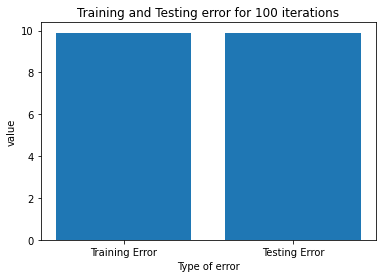

In [104]:
fig,ax = plt.subplots();
ax.bar(['Training Error','Testing Error'],[training_error,testing_error])
ax.set_xlabel('Type of error')
ax.set_ylabel('value')
ax.set_title('Training and Testing error for 100 iterations')

<b>Regularised:</b>

In [145]:
theta_reg = [
gradient_descent_regularised(X, y1, theta, 0.02, 100,0.001)
,gradient_descent_regularised(X, y1, theta, 0.02, 100,0.002)
,gradient_descent_regularised(X, y1, theta, 0.02, 100,0.005)
,gradient_descent_regularised(X, y1, theta, 0.02, 100,0.01)
,gradient_descent_regularised(X, y1, theta, 0.02, 100,0.0001)]
preds = []
for i in theta_reg:
    pred.append(predictions(i))
pred

,0,1,2,3,4,5,6,7,8,9,...,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
2,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
3,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
4,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
5,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
6,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
7,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
8,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
9,7.747499e-08,1.600361e-08,6.626239e-09,3.439439e-08,2.348821e-07,6.889714e-10,1.404274e-07,4.256985e-08,2.341446e-08,3.546240e-10,...,0.000001,1.648634e-09,1.511588e-09,6.357508e-09,1.010120e-07,2.074296e-07,4.855797e-07,1.871306e-09,1.887829e-08,4.435332e-07
